# Ratings Prediction

We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review.

In [1]:
#Importing  libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv('Reviews.csv') 
df  

Unnamed: 0  Unnamed: 0.1  Rating  \
0               0           0.0       5   
1               1           1.0       5   
2               2           2.0       5   
3               3           3.0       5   
4               4           4.0       5   
...           ...           ...     ...   
27704       27704           NaN       5   
27705       27705           NaN       5   
27706       27706           NaN       5   
27707       27707           NaN       5   
27708       27708           NaN       5   

                                                  Review  
0      The Best Phone for the Money\n\nThe iPhone 11 ...  
1      Really satisfied with the Product I received.....  
2      Amazing phone with great cameras and better ba...  
3      This is my first iOS phone. I am very happy wi...  
4      Previously I was using one plus 3t it was a gr...  
...                                                  ...  
27704  I have used it from the day i haven't found an...  
27705  Good bluetooth earphones in this price range.\...  
27706  Build quality and length is apt. And fits perf...  
27707  amazing quality for the price.. and the neck b...  
27708  Good earphones considering the price.\nBattery...  

[27709 rows x 4 columns]

In [3]:
#droping unwanted columns
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [4]:
df

Rating                                             Review
0           5  The Best Phone for the Money\n\nThe iPhone 11 ...
1           5  Really satisfied with the Product I received.....
2           5  Amazing phone with great cameras and better ba...
3           5  This is my first iOS phone. I am very happy wi...
4           5  Previously I was using one plus 3t it was a gr...
...       ...                                                ...
27704       5  I have used it from the day i haven't found an...
27705       5  Good bluetooth earphones in this price range.\...
27706       5  Build quality and length is apt. And fits perf...
27707       5  amazing quality for the price.. and the neck b...
27708       5  Good earphones considering the price.\nBattery...

[27709 rows x 2 columns]

In [5]:
df.shape
#checking the shape of our dataset

(27709, 2)

we have 27709 rows and 2 columns.

In [6]:
#Checking counts of individual ratings
df.Rating.value_counts()

5    6353
1    6035
4    5615
2    5543
3    4163
Name: Rating, dtype: int64

### Data Preprocessing

In [18]:
#Checking for null values 
df.isnull().sum()

Rating    0
Review    0
dtype: int64

In [19]:
#Checking the datatype of all the columns present
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27709 entries, 0 to 27708
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  27709 non-null  int64 
 1   Review  27709 non-null  object
dtypes: int64(1), object(1)
memory usage: 433.1+ KB


In [21]:
#Checking the average rating given by the users
avg = df['Rating'].mean()
Avg = round(avg,1)
print("Average rating given by users is " + str(Avg))

Average rating given by users is 3.0


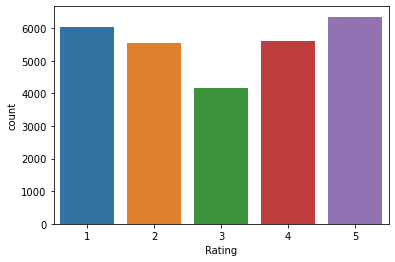

In [23]:
sns.countplot(df.Rating)
plt.show()

### PREPROCESSING

In [24]:
#Importing required libraries
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
#!pip install wordcloud

In [27]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# making a function to clean our data
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [29]:
#Calling the class
clean_text(df,'Review')
df['Review'].head(3)

0    best phone money iphone numbr offers superb ca...
1    really satisfied product received totally genu...
2    amazing phone great cameras better battery giv...
Name: Review, dtype: object

In [30]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Review'] = df['Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

Rating                                             Review
0       5  [best, phone, money, iphone, numbr, offers, su...
1       5  [really, satisfied, product, received, totally...
2       5  [amazing, phone, great, cameras, better, batte...
3       5  [first, ios, phone, happy, product, much, sati...
4       5  [previously, using, one, plus, numbrt, great, ...

In [31]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [32]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\janak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
#Processing review with above Function
processed_review = []

for doc in df.Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

27709


[['best',
  'phone',
  'money',
  'iphon',
  'numbr',
  'offer',
  'superb',
  'camera',
  'durabl',
  'design',
  'excel',
  'batteri',
  'life',
  'afford',
  'price',
  'compel',
  'ultra',
  'wide',
  'camera',
  'new',
  'night',
  'mode',
  'excel',
  'long',
  'batteri',
  'life'],
 ['realli',
  'satisfi',
  'product',
  'receiv',
  'total',
  'genuin',
  'packag',
  'also',
  'realli',
  'good',
  'plan',
  'buy'],
 ['amaz',
  'phone',
  'great',
  'camera',
  'better',
  'batteri',
  'give',
  'best',
  'perform',
  'love',
  'camera']]

In [34]:
df['clean_review']=processed_review  #Assigning this to the dataframe
df.head()

Rating                                             Review  \
0       5  [best, phone, money, iphone, numbr, offers, su...   
1       5  [really, satisfied, product, received, totally...   
2       5  [amazing, phone, great, cameras, better, batte...   
3       5  [first, ios, phone, happy, product, much, sati...   
4       5  [previously, using, one, plus, numbrt, great, ...   

                                        clean_review  
0  [best, phone, money, iphon, numbr, offer, supe...  
1  [realli, satisfi, product, receiv, total, genu...  
2  [amaz, phone, great, camera, better, batteri, ...  
3  [first, io, phone, happi, product, much, satis...  
4  [previous, use, one, plus, numbrt, great, phon...

In [38]:
df['Review'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))
df.head()

Rating                                             Review  \
0       5  best phone money iphon numbr offer superb came...   
1       5  realli satisfi product receiv total genuin pac...   
2       5  amaz phone great camera better batteri give be...   
3       5  first io phone happi product much satisfi love...   
4       5  previous use one plus numbrt great phone decid...   

                                        clean_review  
0  [best, phone, money, iphon, numbr, offer, supe...  
1  [realli, satisfi, product, receiv, total, genu...  
2  [amaz, phone, great, camera, better, batteri, ...  
3  [first, io, phone, happi, product, much, satis...  
4  [previous, use, one, plus, numbrt, great, phon...

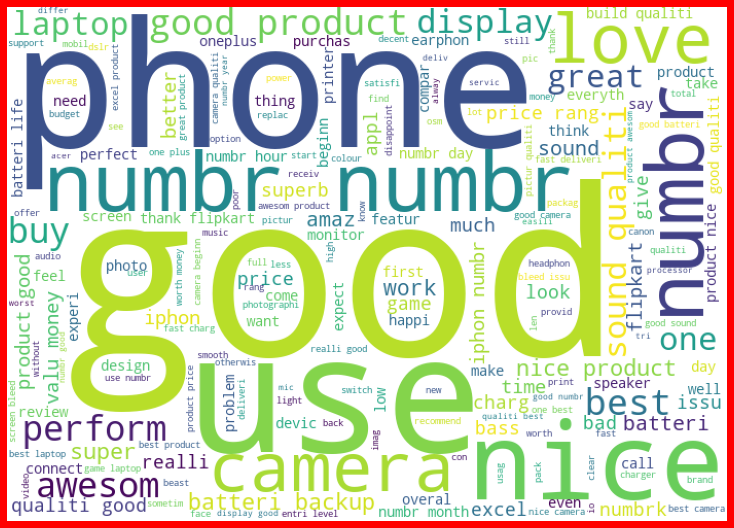

In [40]:
#Getting sense of words in Rating 5
one = df['Review'][df['Rating']==5.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

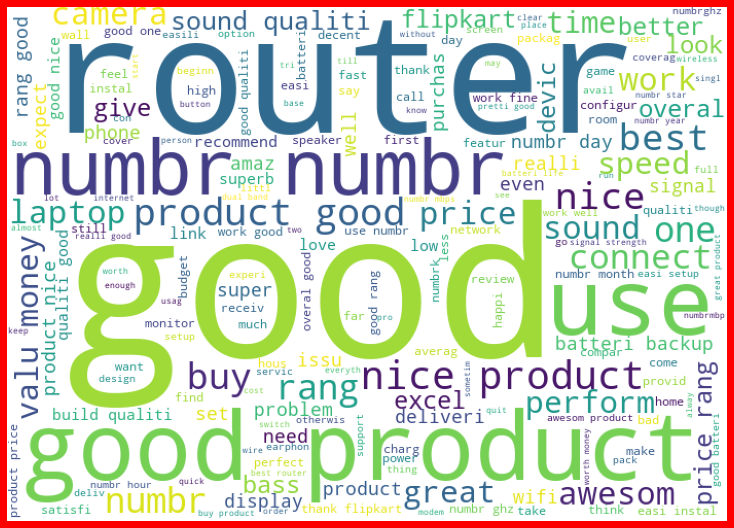

In [41]:
#Getting sense of words in Rating 4
one = df['Review'][df['Rating']==4.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

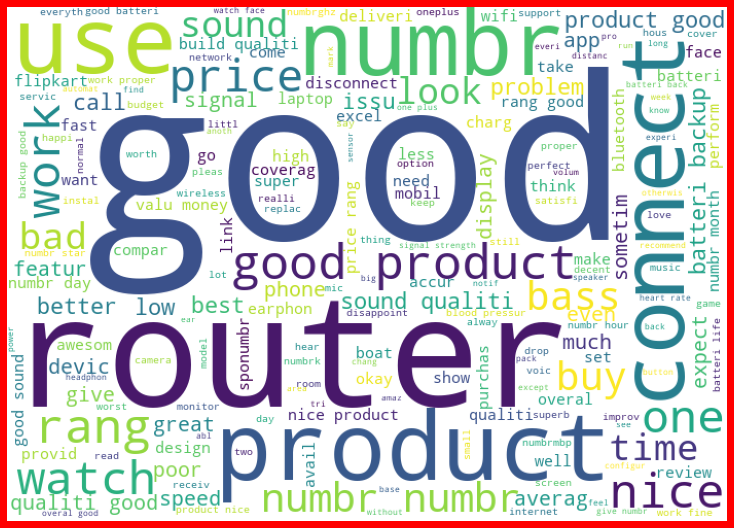

In [42]:
#Getting sense of words in Rating 3
one = df['Review'][df['Rating']==3.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

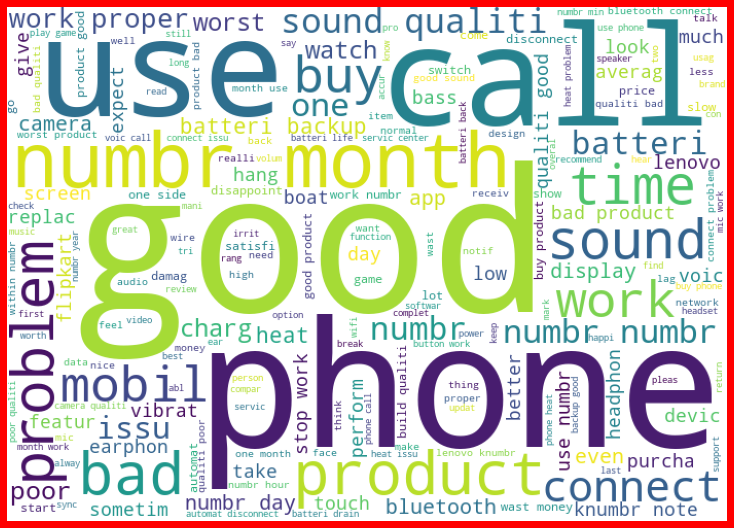

In [43]:
#Getting sense of words in Rating 2
one = df['Review'][df['Rating']==2.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

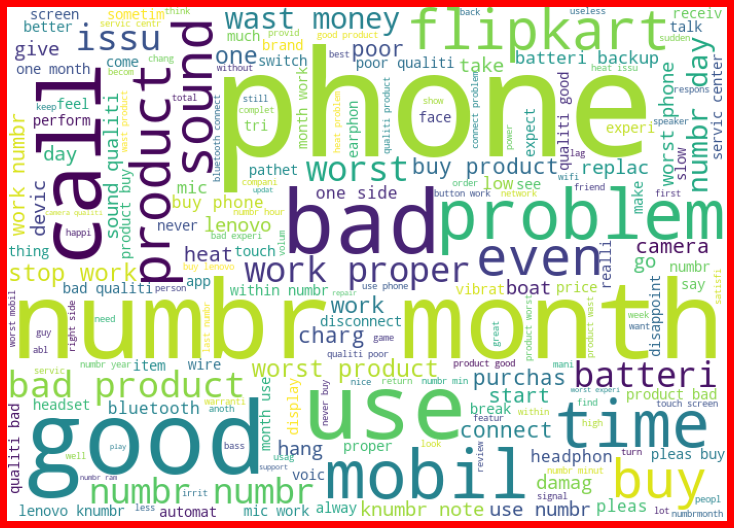

In [44]:
#Getting sense of words in Rating 1
one = df['Review'][df['Rating']==1.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Feature Selection

In [45]:

#Converting text into numeric using TfidfVectorizer
#create object
tf = TfidfVectorizer()

#fitting
features = tf.fit_transform(df['Review'])
#Splitting dataset into x and y
x=features
y=df[['Rating']]

x.shape

(27709, 7968)

In [46]:
y.shape

(27709, 1)

# Model Building

In [47]:
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(x_train,y_train)
        pred=reg.predict(x_test)
        acc_score=accuracy_score(y_test,pred)
        #print("The accuracy score at r_state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [50]:
LR=LogisticRegression()
max_acc_score(LR,x,y)

The maximum accuracy score 0.5425839047275351 is achieved at 52


0.5425839047275351

In [51]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=52,test_size=.20)

In [52]:

#Importing various classification models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [54]:
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [55]:
#Importing required modules and metrices
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [56]:

#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n\n\n')

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.5425839047275351


cross_val_score:  0.45324338217953486


Classification report:
 
              precision    recall  f1-score   support

           1       0.61      0.68      0.64      1241
           2       0.52      0.50      0.51      1127
           3       0.48      0.29      0.36       814
           4       0.48      0.53      0.51      1083
           5       0.56      0.62      0.59      1277

    accuracy                           0.54      5542
   macro avg       0.53      0.52      0.52      5542
weighted avg       0.54      0.54      0.54      5542



Confusion matrix: 

[[839 281  35  41  45]
 [365 566  79  56  61]
 [ 48 129 237 252 148]
 [ 28  42  80 578 355]
 [ 90  64  63 273 787]]




****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.5346445326596897


cross_val_score:  0.45046441308

In [57]:

#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs})
result

Model  Accuracy_score  Cross_val_score
0         Logistic Regression       54.258390        45.324338
1               MultinomialNB       53.464453        45.046441
2      DecisionTreeClassifier       52.580296        44.754201
3        KNeighborsClassifier       37.026344        32.566944
4      RandomForestClassifier       58.444605        49.182286
5          AdaBoostClassifier       46.210754        40.434344
6  GradientBoostingClassifier       50.469145        42.577998

We can see that RandomForest Classifier is giving us the best results, therefore we will be tuning this model for further prediction.

# Hyperparameter Tuning

In [60]:
#RandomForestClassifier
parameters={'n_estimators':[1,10,100]}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=52)   #Using the best random state we obtained
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train,y_train)
print(rfc.best_params_)     #Printing the best parameters obtained
print(rfc.best_score_)      #Mean cross-validated score of best_estimator

{'n_estimators': 100}
0.536743808363784


In [61]:
#Using the best parameters obtained
rfc=RandomForestClassifier(random_state=56,n_estimators=100)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(rfc,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  57.9032840129917
Cross validation score:  46.230616400961736
Classification report: 

              precision    recall  f1-score   support

           1       0.64      0.73      0.68      1241
           2       0.67      0.60      0.64      1127
           3       0.50      0.29      0.37       814
           4       0.48      0.55      0.51      1083
           5       0.57      0.61      0.59      1277

    accuracy                           0.58      5542
   macro avg       0.57      0.56      0.56      5542
weighted avg       0.58      0.58      0.57      5542

Confusion matrix: 

[[912 189  35  55  50]
 [281 681  59  64  42]
 [ 76  82 240 260 156]
 [ 47  30  70 592 344]
 [110  33  78 272 784]]


In [62]:
rfc_prediction=rfc.predict(x)

#Making a dataframe of predictions
rating_prediction=pd.DataFrame({'Predictions':rfc_prediction})
rating_prediction

Predictions
0                5
1                5
2                5
3                5
4                5
...            ...
27704            5
27705            5
27706            5
27707            5
27708            5

[27709 rows x 1 columns]

In [63]:

#Saving the model
import pickle
filename='Ratings_Prediction_Project.pkl'   #Specifying the filename
pickle.dump(rfc,open(filename,'wb'))

In [64]:
#Saving predicted values
rating_prediction.to_csv('RatingsPredictionResults.csv')